# Imports

In [5]:
import pandas as pd

from data_works.general import get_df_from_file

# data collection

In [28]:
DIR_PATH = "performance_data/tx2/benchmark_trt/torch_v2/torch"
sizes = ['large_v1', 'medium_v1', 'small_v1']
priorities = [-15, 0, 15]
devices = ['cuda', 'cpu']

def read_data(sizes, priorities, devices):
    data_dict = {}
    for size in sizes:
        for priority in priorities:
            for device in devices:
                data_dict[f'{device}_{priority}_{size}'] = {
                    'bet': get_df_from_file(DIR_PATH + f'/{device}_{priority}_{size}/batch_exec_times.csv'),
                    'ptv': get_df_from_file(DIR_PATH + f'/{device}_{priority}_{size}/tracked_values.csv'),
                }
    return data_dict

In [29]:
data_dict = read_data(sizes, priorities, devices)

# Organize data

In [30]:
bet_data_frame_compares = {}


# priority compares on cuda for different sizes
device = 'cuda'
size = 'small_v1'
bet_data_frame_compares['priority_compare_df_small_cuda'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['bet']['batch_time'],
    '0': data_dict[f'{device}_{"0"}_{size}']['bet']['batch_time'],
    '15': data_dict[f'{device}_{"15"}_{size}']['bet']['batch_time'],
})

size = 'medium_v1'
bet_data_frame_compares['priority_compare_df_medium_cuda'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['bet']['batch_time'],
    '0': data_dict[f'{device}_{"0"}_{size}']['bet']['batch_time'],
    '15': data_dict[f'{device}_{"15"}_{size}']['bet']['batch_time'],
})

size = 'large_v1'
bet_data_frame_compares['priority_compare_df_large_cuda'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['bet']['batch_time'],
    '0': data_dict[f'{device}_{"0"}_{size}']['bet']['batch_time'],
    '15': data_dict[f'{device}_{"15"}_{size}']['bet']['batch_time'],
})

# size compares on cuda for different priorities
device = 'cuda'
priority = '-15'
bet_data_frame_compares['size_compare_df_m15_cuda'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['bet']['batch_time'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['bet']['batch_time'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['bet']['batch_time'],
})

priority = '0'
bet_data_frame_compares['size_compare_df_0_cuda'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['bet']['batch_time'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['bet']['batch_time'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['bet']['batch_time'],
})

priority = '15'
bet_data_frame_compares['size_compare_df_15_cuda'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['bet']['batch_time'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['bet']['batch_time'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['bet']['batch_time'],
})

# device compares on cuda for different sizes
priority = "0"
size = 'small_v1'
bet_data_frame_compares['device_compare_df_small_p0'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['bet']['batch_time'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['bet']['batch_time'],
})

size = 'medium_v1'
bet_data_frame_compares['device_compare_df_medium_p0'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['bet']['batch_time'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['bet']['batch_time'],
})

size = 'large_v1'
bet_data_frame_compares['device_compare_df_large_p0'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['bet']['batch_time'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['bet']['batch_time'],
})

In [31]:
plot_kwargs = {
    'figsize': (8, 8),
    'alpha': 0.5
}

# Plot 

In [38]:
plotted_df_key = 'priority_compare_df_large_cuda'

plotted_df = bet_data_frame_compares[plotted_df_key]

# filter outliers
# plotted_df = plotted_df[plotted_df < 1].dropna()

stats_df = pd.DataFrame({
    'std': plotted_df.std(),
    'mean': plotted_df.mean()
})
# plotted_df
stats_df

,std,mean
-15,0.000398,0.000913
0,0.000330,0.000815
15,0.000374,0.000837


<AxesSubplot:xlabel='Time'>

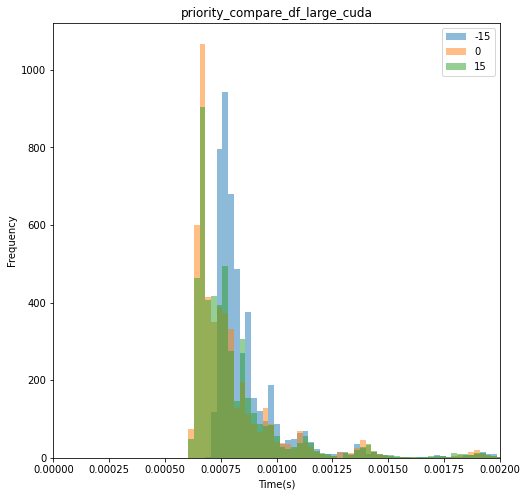

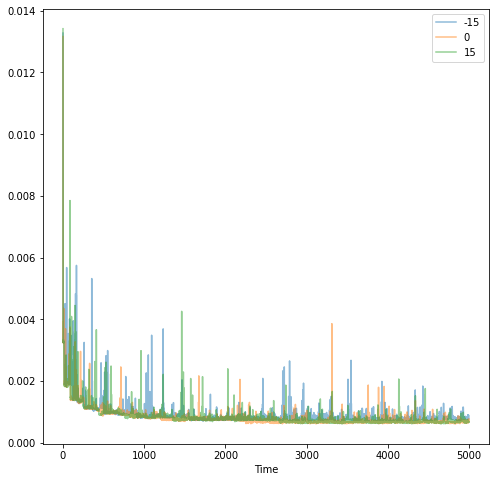

In [39]:
xlim = None
bins = 500
xlim = (0, 0.002)
plotted_df.plot.hist(bins=bins, title=plotted_df_key, **plot_kwargs, xlim=xlim).set_xlabel('Time(s)')
plotted_df.plot(**plot_kwargs, xlabel='Time')

# CPU GPU RAM usage

In [34]:
device = 'cuda'
priority = 0
size = 'small_v1'

data_dict[f'{device}_{priority}_{size}']['ptv']
data_dict[f'{device}_{priority}_{size}']['ptv'].describe()

,CPU1,CPU2,CPU3,CPU4,GPU,RAM_use,RAM_tot,swap,disk_use,disk_tot,time
count,43.000000,43.000000,43.0,43.000000,43.000000,4.300000e+01,43.0,43.0,43.000000,43.000000,43.000000
mean,58.046512,0.186047,0.0,61.697674,59.372093,4.671352e+06,8038784.0,0.0,16.941277,27.435581,2.333311
std,20.682352,1.219989,0.0,20.553687,15.597654,2.557074e+04,0.0,0.0,0.000025,0.000000,1.267376
min,11.000000,0.000000,0.0,18.000000,0.000000,4.649204e+06,8038784.0,0.0,16.941273,27.435581,0.215041
25%,45.000000,0.000000,0.0,44.500000,56.000000,4.650726e+06,8038784.0,0.0,16.941273,27.435581,1.273450
50%,58.000000,0.000000,0.0,66.000000,61.000000,4.662536e+06,8038784.0,0.0,16.941273,27.435581,2.332425
75%,73.500000,0.000000,0.0,80.000000,66.500000,4.688354e+06,8038784.0,0.0,16.941273,27.435581,3.393498
max,100.000000,8.000000,0.0,91.000000,87.000000,4.729196e+06,8038784.0,0.0,16.941433,27.435581,4.453235


In [35]:
ptv_data_frame_compares = {}


####### RAM ######
# priority compares on cuda for different sizes
device = 'cuda'
size = 'small_v1'
ptv_data_frame_compares['priority_compare_df_small_cuda_ram'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['ptv'].describe()['RAM_use'],
    '0': data_dict[f'{device}_{"0"}_{size}']['ptv'].describe()['RAM_use'],
    '15': data_dict[f'{device}_{"15"}_{size}']['ptv'].describe()['RAM_use'],
})

size = 'medium_v1'
ptv_data_frame_compares['priority_compare_df_medium_cuda_ram'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['ptv'].describe()['RAM_use'],
    '0': data_dict[f'{device}_{"0"}_{size}']['ptv'].describe()['RAM_use'],
    '15': data_dict[f'{device}_{"15"}_{size}']['ptv'].describe()['RAM_use'],
})

size = 'large_v1'
ptv_data_frame_compares['priority_compare_df_large_cuda_ram'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['ptv'].describe()['RAM_use'],
    '0': data_dict[f'{device}_{"0"}_{size}']['ptv'].describe()['RAM_use'],
    '15': data_dict[f'{device}_{"15"}_{size}']['ptv'].describe()['RAM_use'],
})

# size compares on cuda for different priorities
device = 'cuda'
priority = '-15'
ptv_data_frame_compares['size_compare_df_m15_cuda_ram'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['ptv'].describe()['RAM_use'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['ptv'].describe()['RAM_use'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['ptv'].describe()['RAM_use'],
})

priority = '0'
ptv_data_frame_compares['size_compare_df_0_cuda_ram'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['ptv'].describe()['RAM_use'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['ptv'].describe()['RAM_use'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['ptv'].describe()['RAM_use'],
})

priority = '15'
ptv_data_frame_compares['size_compare_df_15_cuda_ram'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['ptv'].describe()['RAM_use'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['ptv'].describe()['RAM_use'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['ptv'].describe()['RAM_use'],
})

# device compares on cuda for different sizes
priority = "0"
size = 'small_v1'
ptv_data_frame_compares['device_compare_df_small_p0_ram'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['ptv'].describe()['RAM_use'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['ptv'].describe()['RAM_use'],
})

size = 'medium_v1'
ptv_data_frame_compares['device_compare_df_medium_p0_ram'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['ptv'].describe()['RAM_use'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['ptv'].describe()['RAM_use'],
})

size = 'large_v1'
ptv_data_frame_compares['device_compare_df_large_p0_ram'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['ptv'].describe()['RAM_use'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['ptv'].describe()['RAM_use'],
})

####### GPU ######
# priority compares on cuda for different sizes
device = 'cuda'
size = 'small_v1'
ptv_data_frame_compares['priority_compare_df_small_cuda_gpu'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['ptv'].describe()['GPU'],
    '0': data_dict[f'{device}_{"0"}_{size}']['ptv'].describe()['GPU'],
    '15': data_dict[f'{device}_{"15"}_{size}']['ptv'].describe()['GPU'],
})

size = 'medium_v1'
ptv_data_frame_compares['priority_compare_df_medium_cuda_gpu'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['ptv'].describe()['GPU'],
    '0': data_dict[f'{device}_{"0"}_{size}']['ptv'].describe()['GPU'],
    '15': data_dict[f'{device}_{"15"}_{size}']['ptv'].describe()['GPU'],
})

size = 'large_v1'
ptv_data_frame_compares['priority_compare_df_large_cuda_gpu'] = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['ptv'].describe()['GPU'],
    '0': data_dict[f'{device}_{"0"}_{size}']['ptv'].describe()['GPU'],
    '15': data_dict[f'{device}_{"15"}_{size}']['ptv'].describe()['GPU'],
})

# size compares on cuda for different priorities
device = 'cuda'
priority = '-15'
ptv_data_frame_compares['size_compare_df_m15_cuda_gpu'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['ptv'].describe()['GPU'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['ptv'].describe()['GPU'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['ptv'].describe()['GPU'],
})

priority = '0'
ptv_data_frame_compares['size_compare_df_0_cuda_gpu'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['ptv'].describe()['GPU'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['ptv'].describe()['GPU'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['ptv'].describe()['GPU'],
})

priority = '15'
ptv_data_frame_compares['size_compare_df_15_cuda_gpu'] = pd.DataFrame({
    'small': data_dict[f'{device}_{priority}_{"small_v1"}']['ptv'].describe()['GPU'],
    'medium': data_dict[f'{device}_{priority}_{"medium_v1"}']['ptv'].describe()['GPU'],
    'large': data_dict[f'{device}_{priority}_{"large_v1"}']['ptv'].describe()['GPU'],
})

# device compares on cuda for different sizes
priority = "0"
size = 'small_v1'
ptv_data_frame_compares['device_compare_df_small_p0_gpu'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['ptv'].describe()['GPU'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['ptv'].describe()['GPU'],
})

size = 'medium_v1'
ptv_data_frame_compares['device_compare_df_medium_p0_gpu'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['ptv'].describe()['GPU'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['ptv'].describe()['GPU'],
})

size = 'large_v1'
ptv_data_frame_compares['device_compare_df_large_p0_gpu'] = pd.DataFrame({
    'cuda': data_dict[f'{"cuda"}_{priority}_{size}']['ptv'].describe()['GPU'],
    'cpu': data_dict[f'{"cpu"}_{priority}_{size}']['ptv'].describe()['GPU'],
})

In [36]:
plotted_df_key = 'size_compare_df_0_cuda_gpu'

plotted_df = ptv_data_frame_compares[plotted_df_key]
plotted_df

,small,medium,large
count,43.000000,47.000000,41.000000
mean,59.372093,62.191489,66.682927
std,15.597654,10.366414,11.630647
min,0.000000,0.000000,0.000000
25%,56.000000,60.000000,65.000000
50%,61.000000,62.000000,67.000000
75%,66.500000,67.000000,71.000000
max,87.000000,77.000000,83.000000


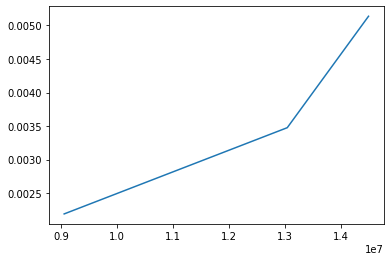

In [37]:
ops = [14501100, 13048020, 9059300]
means = [0.005138, 0.003476, 0.002190]
import matplotlib.pyplot as plt

plt.plot(ops, means)